In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
from matplotlib import pyplot as plt
import warnings
%matplotlib inline 
import seaborn as sns
# Disable Python INFO and WARNING messages
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
# Load cleaned real estate data 
df = pd.read_csv('data/cleaned_df.csv')
entries = df.shape[0]
features = df.shape[1]
df.head()

tx_price  beds  baths  sqft  year_built  lot_size  \
0    295850     1      1   584        2013         0   
1    216500     1      1   612        1965         0   
2    279900     1      1   615        1963         0   
3    379900     1      1   618        2000     33541   
4    340000     1      1   634        1992         0   

                   property_type exterior_walls                 roof  \
0  Apartment / Condo / Townhouse    Wood Siding              Missing   
1  Apartment / Condo / Townhouse          Brick  Composition Shingle   
2  Apartment / Condo / Townhouse    Wood Siding              Missing   
3  Apartment / Condo / Townhouse    Wood Siding              Missing   
4  Apartment / Condo / Townhouse          Brick              Missing   

   basement  restaurants  groceries  nightlife  cafes  shopping  \
0       0.0          107          9         30     19        89   
1       1.0          105         15          6     13        87   
2       0.0          183         13         31     30       101   
3       0.0          198          9         38     25       127   
4       0.0          149          7         22     20        83   

   arts_entertainment  beauty_spas  active_life  median_age  married  \
0                   6           47           58        33.0     65.0   
1                   2           26           14        39.0     73.0   
2                  10           74           62        28.0     15.0   
3                  11           72           83        36.0     25.0   
4                  10           50           73        37.0     20.0   

   college_grad  property_tax  insurance  median_school  num_schools  tx_year  
0          84.0         234.0       81.0            9.0          3.0     2013  
1          69.0         169.0       51.0            3.0          3.0     2006  
2          86.0         216.0       74.0            8.0          3.0     2012  
3          91.0         265.0       92.0            9.0          3.0     2005  
4          75.0          88.0       30.0            9.0          3.0     2002

In [4]:
# Create indicator feature for properties with 2 beds and 2 baths -- based on domain knowledge (premium on such housing)
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

# Display percent of rows where two_and_two == 1
df.two_and_two.mean()

0.09458023379383634

In [5]:
# Create indicator feature for transactions between 2010 and 2013, inclusive -- based on housing recession
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int) # or df.tx_year.between(2010, 2013).astype(int)

# Print percent of transactions where during_recession == 1
df.during_recession.mean()

0.2635494155154091

In [6]:
# Create a property age feature -- based on interaction of existing features
df['property_age'] = df.tx_year - df.year_built


# sanity check -- Number of observations with 'property_age' < 0
print( sum(df.property_age < 0) )

19


In [7]:
# Remove rows where property_age is less than 0 
df = df[df.property_age >= 0]

# Print number of rows and columns in remaining dataframe
print (df.shape)

(1863, 29)


In [8]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df.num_schools * df.median_school

# Display median school score
df.school_score.median()

18.0

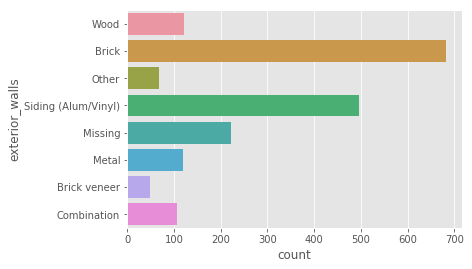

In [9]:
# Dealing with sparse classes

# Group 'Wood Siding' and 'Wood Shingle' with 'Wood' 
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

# List of classes to group
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']

# Group other classes into 'Other'
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)

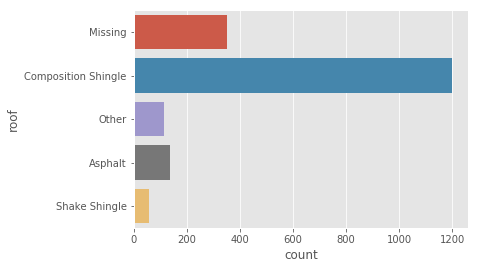

In [10]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

# List of classes to group
other_roofs = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

# Group other classes into 'Other'
df.roof.replace(other_roofs, 'Other', inplace=True)

# Bar plot for roof
sns.countplot(y='roof', data=df)

In [11]:
# Create new dataframe with dummy features 
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])
df.head()

tx_price  beds  baths  sqft  year_built  lot_size  basement  restaurants  \
0    295850     1      1   584        2013         0       0.0          107   
1    216500     1      1   612        1965         0       1.0          105   
2    279900     1      1   615        1963         0       0.0          183   
3    379900     1      1   618        2000     33541       0.0          198   
4    340000     1      1   634        1992         0       0.0          149   

   groceries  nightlife  cafes  shopping  arts_entertainment  beauty_spas  \
0          9         30     19        89                   6           47   
1         15          6     13        87                   2           26   
2         13         31     30       101                  10           74   
3          9         38     25       127                  11           72   
4          7         22     20        83                  10           50   

   active_life  median_age  married  college_grad  property_tax  insurance  \
0           58        33.0     65.0          84.0         234.0       81.0   
1           14        39.0     73.0          69.0         169.0       51.0   
2           62        28.0     15.0          86.0         216.0       74.0   
3           83        36.0     25.0          91.0         265.0       92.0   
4           73        37.0     20.0          75.0          88.0       30.0   

   median_school  num_schools  tx_year  two_and_two  during_recession  \
0            9.0          3.0     2013            0                 1   
1            3.0          3.0     2006            0                 0   
2            8.0          3.0     2012            0                 1   
3            9.0          3.0     2005            0                 0   
4            9.0          3.0     2002            0                 0   

   property_age  school_score  exterior_walls_Brick  \
0             0          27.0                   0.0   
1            41           9.0                   1.0   
2            49          24.0                   0.0   
3             5          27.0                   0.0   
4            10          27.0                   1.0   

   exterior_walls_Brick veneer  exterior_walls_Combination  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   

   exterior_walls_Metal  exterior_walls_Missing  exterior_walls_Other  \
0                   0.0                     0.0                   0.0   
1                   0.0                     0.0                   0.0   
2                   0.0                     0.0                   0.0   
3                   0.0                     0.0                   0.0   
4                   0.0                     0.0                   0.0   

   exterior_walls_Siding (Alum/Vinyl)  exterior_walls_Wood  roof_Asphalt  \
0                                 0.0                  1.0           0.0   
1                                 0.0                  0.0           0.0   
2                                 0.0                  1.0           0.0   
3                                 0.0                  1.0           0.0   
4                                 0.0                  0.0           0.0   

   roof_Composition Shingle  roof_Missing  roof_Other  roof_Shake Shingle  \
0                       0.0           1.0         0.0                 0.0   
1                       1.0           0.0         0.0                 0.0   
2                       0.0           1.0         0.0                 0.0   
3                       0.0           1.0         0.0                 0.0   
4                       0.0           1.0         0.0                 0.0   

   property_type_Apartment / Condo / Townhouse  property_type_Single-Family  
0               

In [12]:
# Drop 'tx_year' and 'year_built' from the dataset since its used by 'property_age'
df = df.drop(['tx_year', 'year_built'], axis=1)

# Save analytical base table
df.to_csv('data/analytical_base_table.csv', index=None)